In [235]:
import pandas as pd
#pd.set_option('display.max_rows', None)

import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel('dati.xlsx', parse_dates=True)
df.head(30)

,Calendario,Quantita,Tipologia
0,2021-05-05,2.00,Spine
1,2021-05-21,3.25,Spine
2,2021-05-25,228.00,Spine
3,2021-05-26,181.80,Spine
4,2021-05-27,256.00,Spine
5,2021-05-28,246.00,Spine
6,2021-05-29,233.00,Spine
7,2021-05-30,209.00,Spine
8,2021-05-31,153.00,Spine
9,2021-06-01,222.00,Spine


In [8]:
copia_df=df.copy()

,Calendario,Quantita,Tipologia
516,2022-11-05,534.01,Spine
31,2021-06-23,566.00,Spine
434,2022-08-11,566.99,Spine
59,2021-07-21,573.00,Spine
81,2021-08-12,650.00,Spine


In [9]:
df_spine=copia_df[copia_df['Tipologia']=='Spine']
df_spine=df_spine.drop('Tipologia',axis=1)
df_spine.head()

,Calendario,Quantita
0,2021-05-05,2.00
1,2021-05-21,3.25
2,2021-05-25,228.00
3,2021-05-26,181.80
4,2021-05-27,256.00


In [68]:
df_spine.describe()

,Quantita
count,521.000000
mean,190.271727
std,89.506080
min,2.000000
25%,127.040000
50%,177.000000
75%,236.970000
max,650.000000


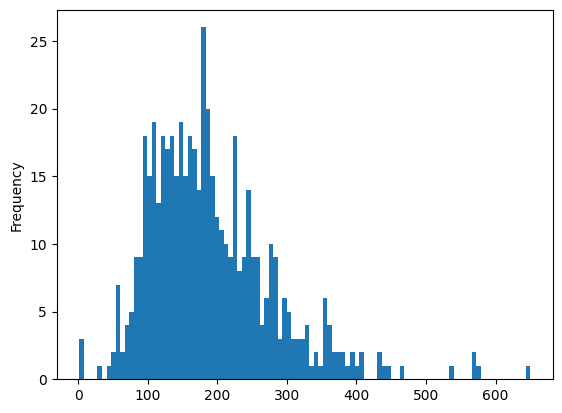

In [12]:
df_spine['Quantita'].plot(kind='hist', bins=100);

In [13]:
df_spine_rid = df_spine[(df_spine['Quantita']<370) & (df_spine['Quantita']>10)]

In [236]:
df_spine_rid.describe()

,y
count,498.00000
mean,180.96257
std,71.48797
min,33.00000
25%,126.00250
50%,173.50000
75%,227.95500
max,367.00000


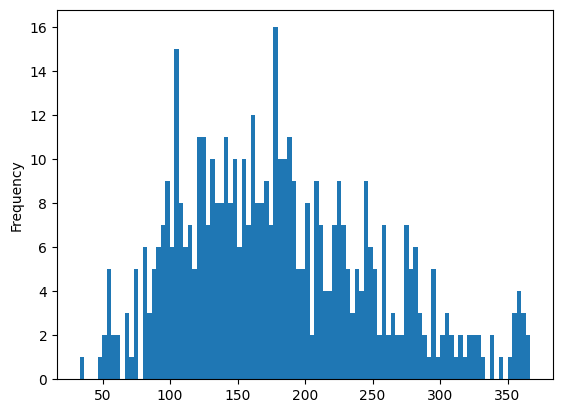

In [238]:
df_spine_rid['y'].plot(kind='hist', bins=100);

In [16]:
from prophet import Prophet

In [17]:
df_spine_rid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 2 to 520
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Calendario  498 non-null    datetime64[ns]
 1   Quantita    498 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.7 KB


In [18]:
df_spine.head()

,Calendario,Quantita
0,2021-05-05,2.00
1,2021-05-21,3.25
2,2021-05-25,228.00
3,2021-05-26,181.80
4,2021-05-27,256.00


In [19]:
df_spine_rid.head()

,Calendario,Quantita
2,2021-05-25,228.0
3,2021-05-26,181.8
4,2021-05-27,256.0
5,2021-05-28,246.0
6,2021-05-29,233.0


In [20]:
df_spine_rid.columns = ['ds','y']

In [21]:
df_spine_rid = df_spine_rid.reset_index()

In [22]:
df_spine_rid = df_spine_rid.drop('index',axis=1)
df_spine_rid.head()

,ds,y
0,2021-05-25,228.0
1,2021-05-26,181.8
2,2021-05-27,256.0
3,2021-05-28,246.0
4,2021-05-29,233.0


In [23]:
df_spine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521 entries, 0 to 520
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Calendario  521 non-null    datetime64[ns]
 1   Quantita    521 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.2 KB


In [24]:
df_spine.head(10)

,Calendario,Quantita
0,2021-05-05,2.00
1,2021-05-21,3.25
2,2021-05-25,228.00
3,2021-05-26,181.80
4,2021-05-27,256.00
5,2021-05-28,246.00
6,2021-05-29,233.00
7,2021-05-30,209.00
8,2021-05-31,153.00
9,2021-06-01,222.00


In [247]:
m = Prophet(daily_seasonality  = False,
            weekly_seasonality = True,
            yearly_seasonality = True,
            seasonality_mode   ='additive',
            interval_width=0.95,
            )
#model.add_regressor('summer_temp',standardize=False, mode='additive')
model = m.fit(df_spine_rid)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ALESSA~1\\AppData\\Local\\Temp\\tmp1allt2g0\\iafqvez2.json'

In [86]:
future = model.make_future_dataframe(periods=0) #di default Prophet usa freq='D', cioè usa i giorni come frequenza
future.tail()

,ds
493,2022-11-04
494,2022-11-19
495,2022-11-20
496,2022-11-21
497,2022-11-22


In [87]:
forecast = model.predict(future)
forecast.tail(60)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
438,2022-09-08,151.416090,85.408826,264.231075,151.416090,151.416090,22.188710,22.188710,22.188710,-11.570005,-11.570005,-11.570005,33.758716,33.758716,33.758716,0.0,0.0,0.0,173.604800
439,2022-09-09,151.306178,152.652434,343.228987,151.306178,151.306178,98.185066,98.185066,98.185066,64.316116,64.316116,64.316116,33.868950,33.868950,33.868950,0.0,0.0,0.0,249.491244
440,2022-09-10,151.196267,133.231771,328.308060,151.196267,151.196267,76.843053,76.843053,76.843053,42.826198,42.826198,42.826198,34.016856,34.016856,34.016856,0.0,0.0,0.0,228.039320
441,2022-09-11,151.086355,63.571839,257.840913,151.086355,151.086355,7.797957,7.797957,7.797957,-26.399290,-26.399290,-26.399290,34.197247,34.197247,34.197247,0.0,0.0,0.0,158.884312
442,2022-09-12,150.976444,30.134079,228.531976,150.976444,150.976444,-23.069862,-23.069862,-23.069862,-57.473118,-57.473118,-57.473118,34.403255,34.403255,34.403255,0.0,0.0,0.0,127.906582
443,2022-09-13,150.866532,64.489261,253.298317,150.866532,150.866532,7.875850,7.875850,7.875850,-26.750543,-26.750543,-26.750543,34.626394,34.626394,34.626394,0.0,0.0,0.0,158.742383
444,2022-09-14,150.756621,102.236287,292.885257,150.756621,150.756621,49.907320,49.907320,49.907320,15.050643,15.050643,15.050643,34.856677,34.856677,34.856677,0.0,0.0,0.0,200.663941
445,2022-09-15,150.646709,81.496882,268.135229,150.646709,150.646709,23.512782,23.512782,23.512782,-11.570005,-11.570005,-11.570005,35.082787,35.082787,35.082787,0.0,0.0,0.0,174.159491
446,2022-09-16,150.536798,152.128802,339.635571,150.536798,150.536798,99.608394,99.608394,99.608394,64.316116,64.316116,64.316116,35.292278,35.292278,35.292278,0.0,0.0,0.0,250.145192
447,2022-09-17,150.426886,131.002115,319.728342,150.426886,150.426886,78.298029,78.298029,78.298029,42.826198,42.826198,42.826198,35.471831,35.471831,35.471831,0.0,0.0,0.0,228.724916


In [29]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

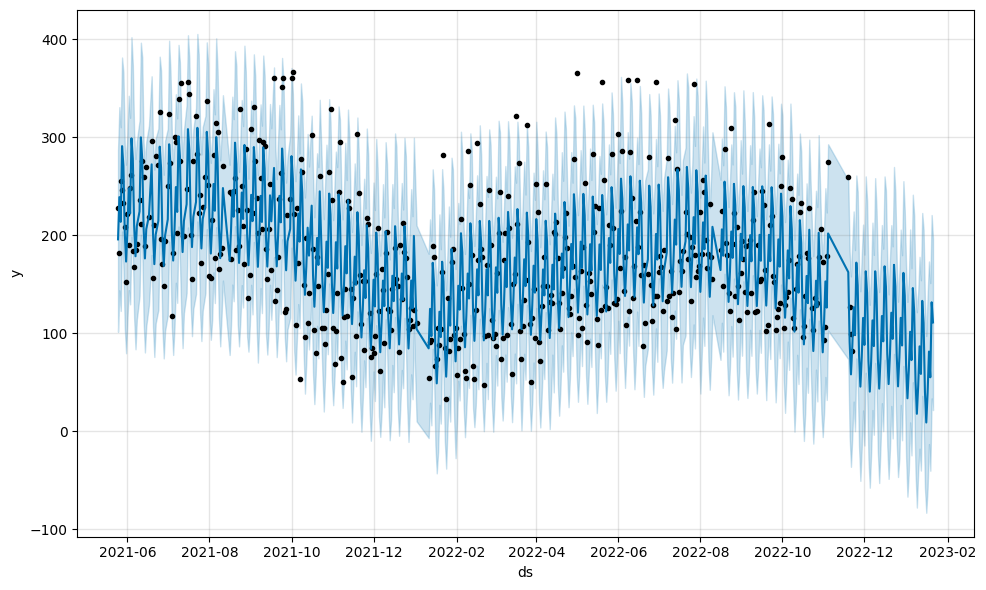

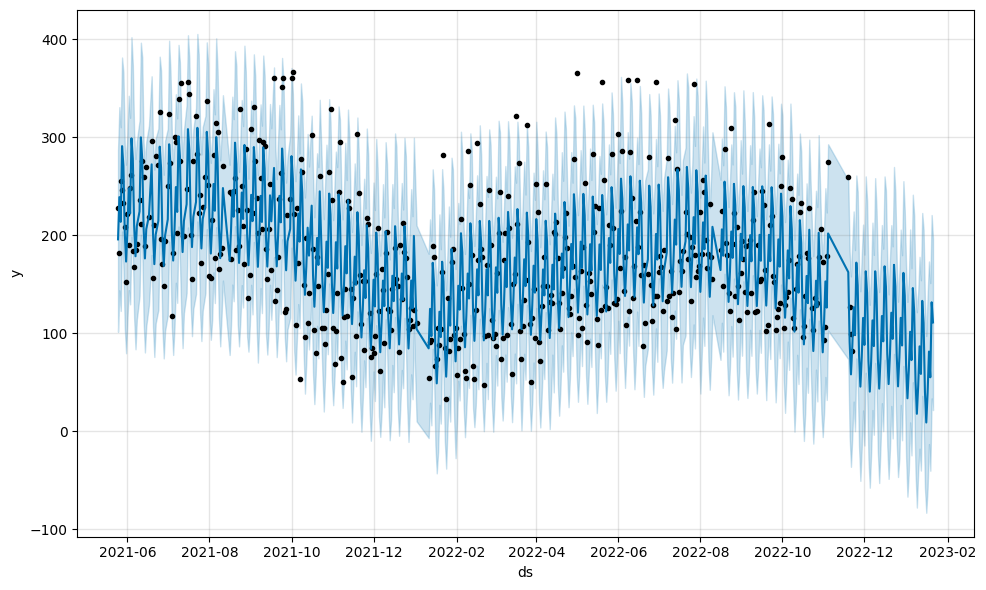

In [84]:
model.plot(forecast)

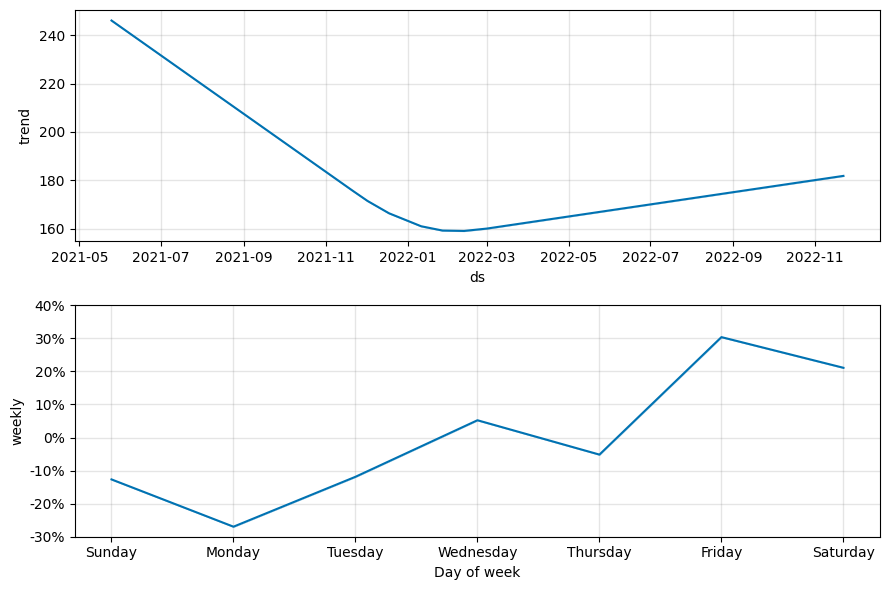

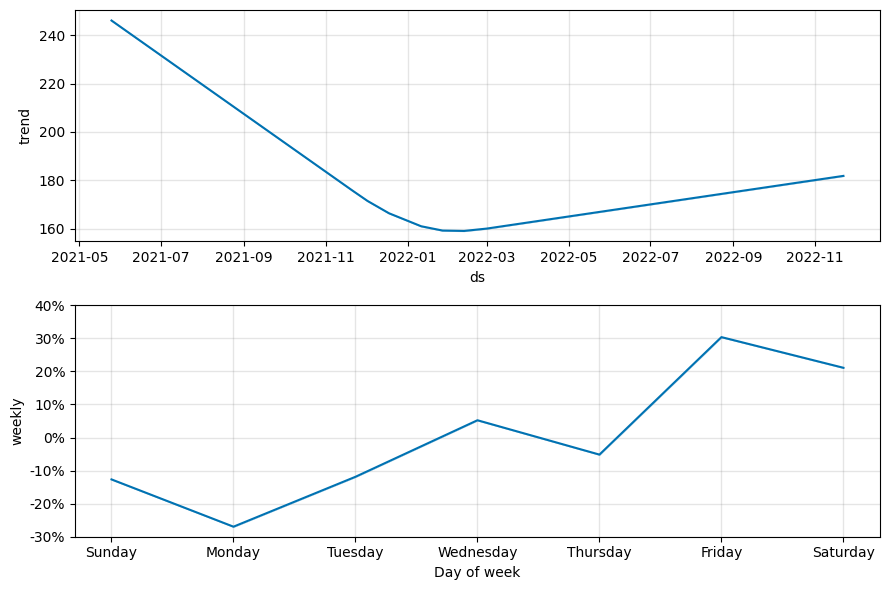

In [223]:
model.plot_components(forecast)

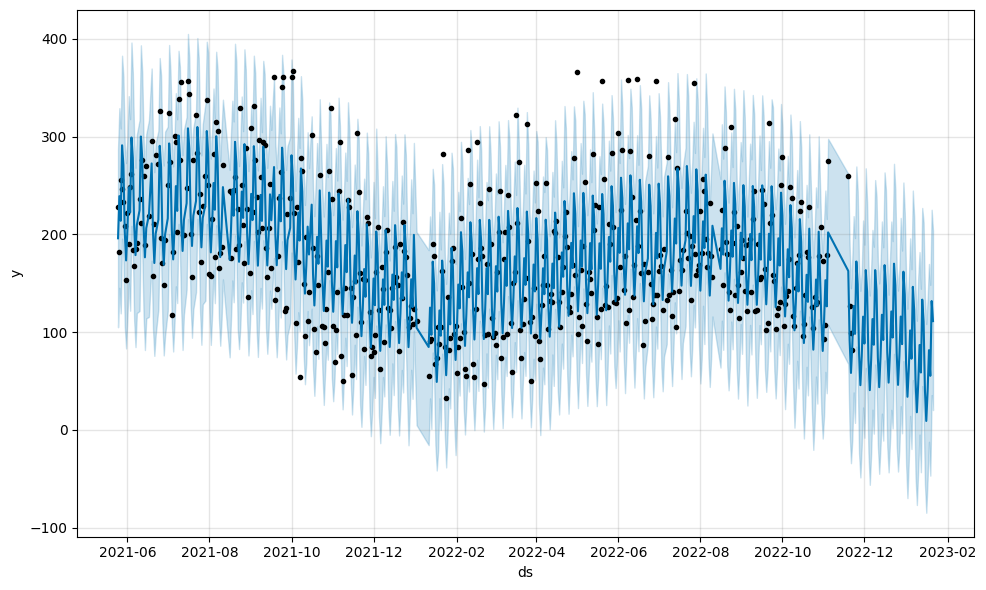

In [32]:
future = model.make_future_dataframe(60) #prevede un certo numero di freq in avanti, ad esempio 2 con freq='W' prevede 2 settimane nel futuro
forecast = model.predict(future)
fig = model.plot(forecast)

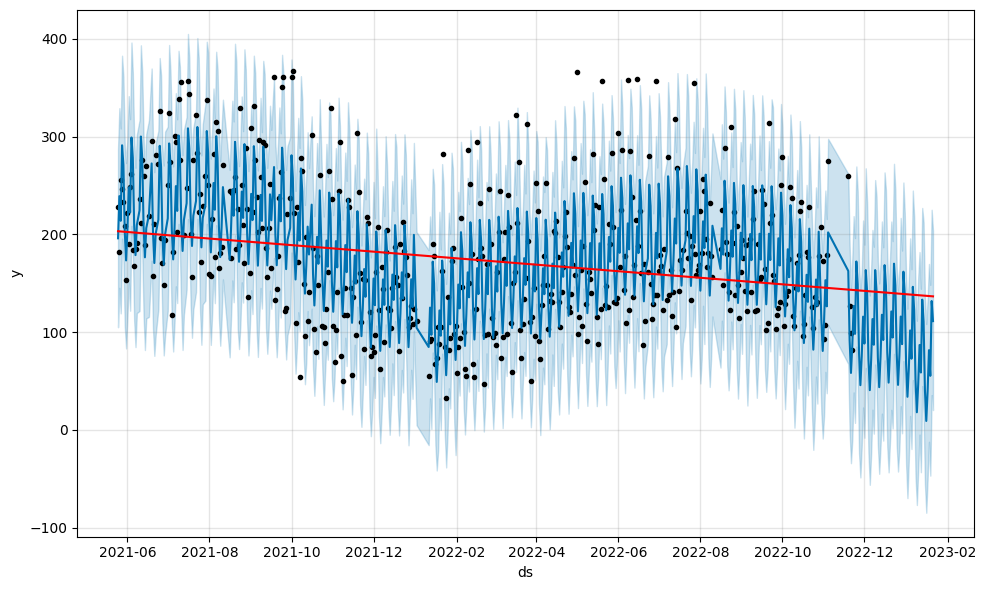

In [33]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

#Change to Multiplicative

13:03:46 - cmdstanpy - INFO - Chain [1] start processing
13:03:46 - cmdstanpy - INFO - Chain [1] done processing


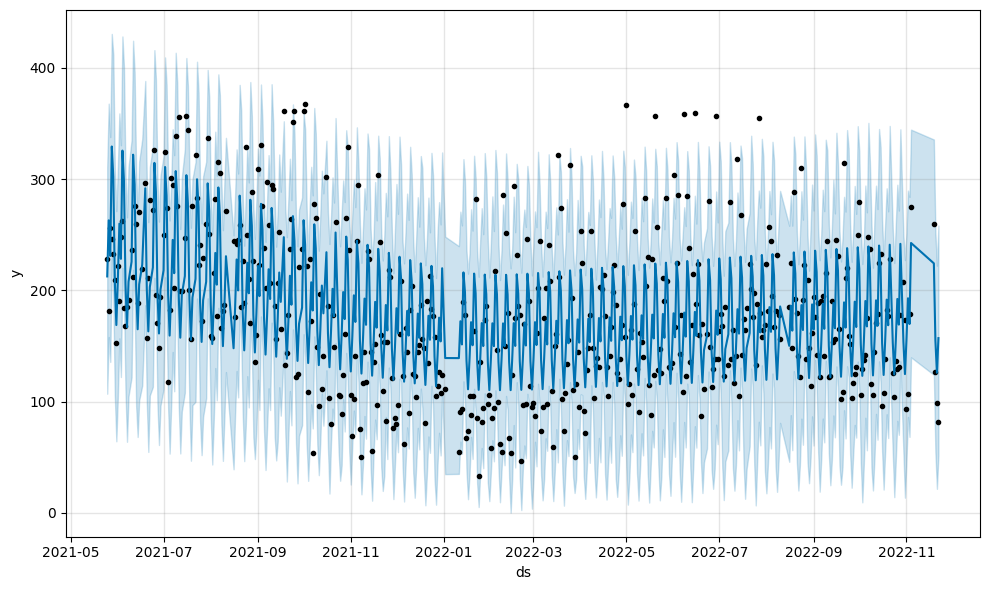

In [183]:
m = Prophet(daily_seasonality  = False,
            weekly_seasonality = True,
            yearly_seasonality = True,
            seasonality_mode = 'multiplicative',
            interval_width=0.95,
            )
model = m.fit(df_spine_rid)
forecast = model.predict(future)
fig = model.plot(forecast)

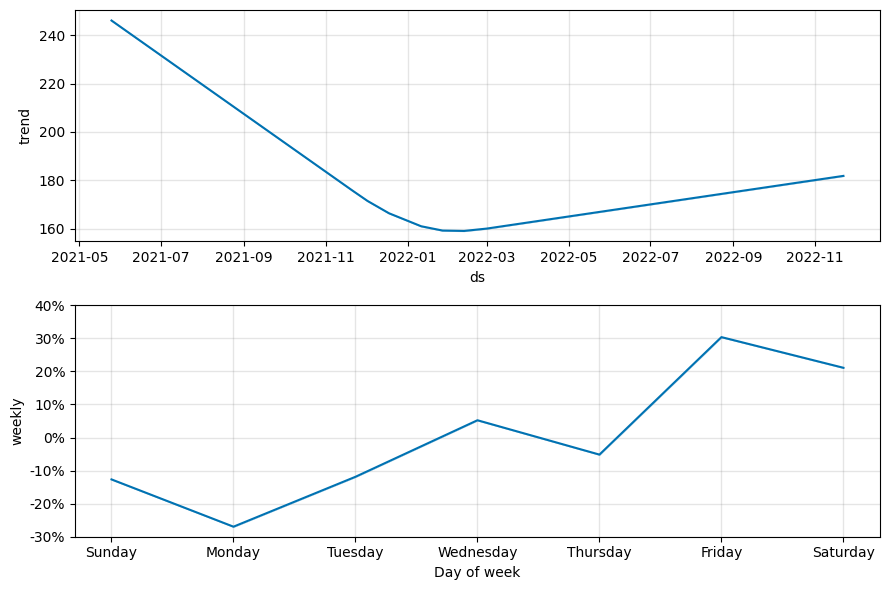

In [226]:
fig = model.plot_components(forecast)

In [36]:
from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

In [37]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'p

In [38]:
model

In [39]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'multiplicative',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'multiplicative',
               'condition_name': None})])

In [40]:
model.component_modes

{'additive': ['additive_terms', 'extra_regressors_additive'],
 'multiplicative': ['yearly',
  'weekly',
  'multiplicative_terms',
  'extra_regressors_multiplicative',
  'holidays']}

In [41]:
df_spine_rid.shape

(498, 2)

In [42]:
help(cross_validation)

Help on function cross_validation in module prophet.diagnostics:

cross_validation(model, horizon, period=None, initial=None, parallel=None, cutoffs=None, disable_tqdm=False)
    Cross-Validation for time series.
    
    Computes forecasts from historical cutoff points, which user can input.
    If not provided, begins from (end - horizon) and works backwards, making
    cutoffs with a spacing of period until initial is reached.
    
    When period is equal to the time interval of the data, this is the
    technique described in https://robjhyndman.com/hyndsight/tscv/ .
    
    Parameters
    ----------
    model: Prophet class object. Fitted Prophet model.
    horizon: string with pd.Timedelta compatible style, e.g., '5 days',
        '3 hours', '10 seconds'.
    period: string with pd.Timedelta compatible style. Simulated forecast will
        be done at every this period. If not provided, 0.5 * horizon is used.
    initial: string with pd.Timedelta compatible style. The first tra

In [44]:
df_cv = cross_validation(model,
                        horizon='60 days',
                        period='10 days',
                        initial='450 days',
                        )

  0%|          | 0/4 [00:00<?, ?it/s]

20:43:24 - cmdstanpy - INFO - Chain [1] start processing
20:43:24 - cmdstanpy - INFO - Chain [1] done processing
20:43:24 - cmdstanpy - INFO - Chain [1] start processing
20:43:25 - cmdstanpy - INFO - Chain [1] done processing
20:43:25 - cmdstanpy - INFO - Chain [1] start processing
20:43:25 - cmdstanpy - INFO - Chain [1] done processing
20:43:26 - cmdstanpy - INFO - Chain [1] start processing
20:43:26 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-08-25,181.744001,91.943746,269.839120,191.00,2022-08-24
1,2022-08-26,250.577766,150.782670,341.718317,223.00,2022-08-24
2,2022-08-27,231.358378,131.163020,329.397808,138.00,2022-08-24
3,2022-08-28,169.296769,82.003179,269.001863,209.01,2022-08-24
4,2022-08-29,141.300010,44.862538,239.763055,147.98,2022-08-24
5,2022-08-30,171.936946,75.720534,266.149145,114.00,2022-08-24
6,2022-08-31,207.986625,113.833834,307.143947,162.00,2022-08-24
7,2022-09-01,182.041457,86.758461,273.860558,194.01,2022-08-24
8,2022-09-02,250.324129,155.549679,348.250625,175.97,2022-08-24
9,2022-09-03,230.982861,141.391106,328.953013,141.90,2022-08-24


In [46]:
df_performance=performance_metrics(df_cv)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,6 days,1466.061140,38.289178,29.800494,0.215762,0.161830,0.185191,1.000000
1,7 days,1645.708113,40.567328,32.674065,0.238483,0.190006,0.202927,1.000000
2,8 days,2125.606407,46.104299,36.972712,0.237889,0.237454,0.213007,0.952381
3,9 days,2286.138960,47.813586,39.470318,0.253985,0.237454,0.226274,0.952381
4,10 days,2453.764731,49.535490,41.305474,0.260189,0.237454,0.231696,0.952381
5,11 days,2452.610398,49.523837,41.169371,0.247185,0.237454,0.222884,0.952381
6,12 days,2253.774298,47.473933,38.311221,0.226738,0.157614,0.207247,0.952381
7,13 days,1605.619708,40.070185,32.108041,0.206885,0.145271,0.185144,0.988095
8,14 days,1240.097593,35.215019,28.470324,0.186949,0.120680,0.166689,1.000000
9,15 days,1224.153347,34.987903,28.875048,0.191369,0.120680,0.170950,1.000000


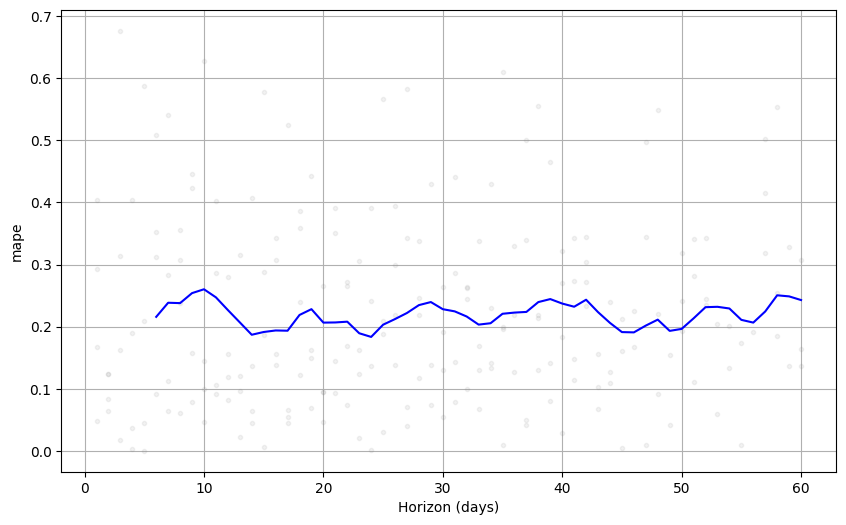

In [47]:
from prophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='mape')

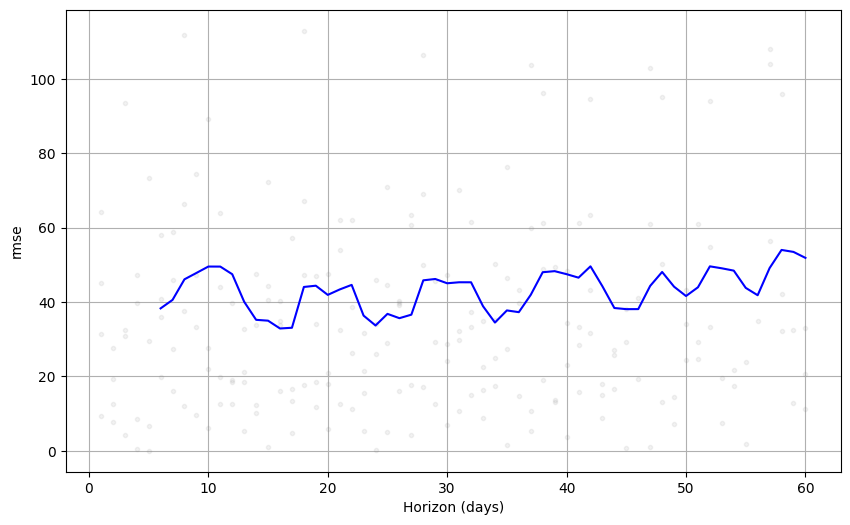

In [48]:
fig=plot_cross_validation_metric(df_cv,metric='rmse')

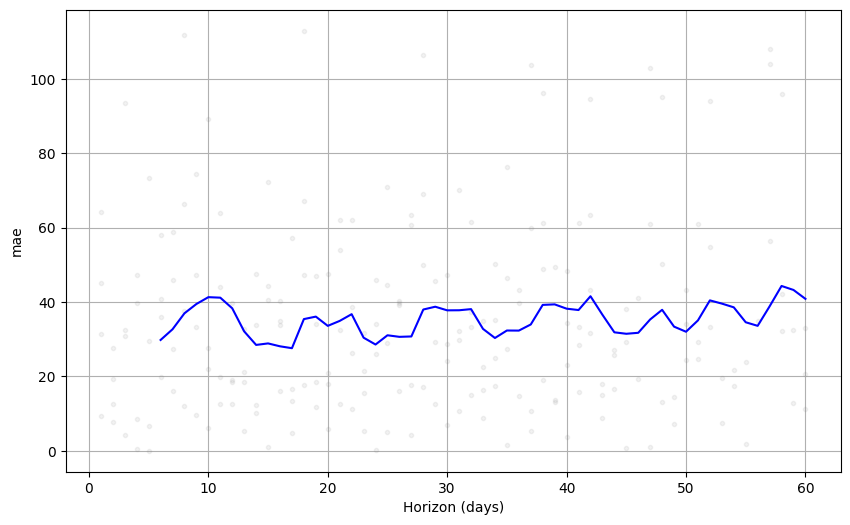

In [49]:
fig=plot_cross_validation_metric(df_cv,metric='mae')

In [ ]:
# import itertools

# param_grid = {  
#      #'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
#      #'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
#       #'changepoint_prior_scale': [0,0.001,0.002,0.003,0.004,0.005],
#       #'seasonality_prior_scale': [1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2],
#     'changepoint_prior_scale': np.arange(0.004164,0.004165, 0.000001),
#     'seasonality_prior_scale': np.arange(1.541,1.542,0.001),
# }

# # Generate all combinations of parameters
# all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# rmses = []  # Store the RMSEs for each params here


# # Use cross validation to evaluate all parameters
# for params in all_params:
#     model = Prophet(**params).fit(df_spine)  # Fit model with given params
#     df_cv = cross_validation(model, 
#                              horizon="30 days",
#                              period='1 days', #shift - moving windows
#                              initial='500 days', 
#                              )
    
#     df_p = performance_metrics(df_cv, rolling_window=1)
#     # rmses.append(df_p['rmse'].values[0])
#     rmses.append(df_p['mape'].values[0])

# # Find the best parameters
# tuning_results = pd.DataFrame(all_params)
# #tuning_results['rmse'] = rmses
# tuning_results['mape'] = rmses
# print(tuning_results)

In [ ]:
# p1=0.01
# p2=1.0
# param_grid = {  
#      'changepoint_prior_scale': [p1],
#      'seasonality_prior_scale': [p2],
# }
# all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# model = Prophet(**all_params[0]).fit(df_spine)  # Fit model with given params
# df_cv = cross_validation(model, 
#                          horizon="30 days",
#                          period='1 days', #shift - moving windows
#                          initial='500 days', 
#                          )
# df_p = performance_metrics(df_cv, rolling_window=1)
# print('Il mape con i valori iniziali messi è', df_p['mape'].values[0])




import itertools
x1=list(np.arange(0.01365,0.01376,0.00001))
x2=list(np.arange(0.0505,0.0516,0.0001))
param_grid = {  
     #'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
     #'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
      #'changepoint_prior_scale': [0.0137,0.0001,0.00001],
      #'seasonality_prior_scale': [0.051],
    'changepoint_prior_scale': x1,#[0.013],
    'seasonality_prior_scale': x2,#[0.045],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mapes = []  # Store the RMSEs for each params here


# Use cross validation to evaluate all parameters
for params in all_params:
    model = Prophet(**params).fit(df_spine_rid)  # Fit model with given params
    df_cv = cross_validation(model, 
                             horizon="60 days",
                             period='10 days', #shift - moving windows
                             initial='450 days', 
                             )
    
    df_p = performance_metrics(df_cv, rolling_window=1)
    # rmses.append(df_p['rmse'].values[0])
    mapes.append(df_p['mape'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
#tuning_results['rmse'] = rmses
tuning_results['mape'] = mapes
print(tuning_results)

In [53]:
#mape con changepoint_prior_scale e seasonality_prior_scale: 21.96 con 0.004 e 1.5, 21.91 con 0.0042 e 1.52, 21.83 con 0.00416 e 1.52
#21.81 con 0.004164 e 1.54, 21.80 con 0.004164 e 1.541, 21.79 con 0.0041645 e 1.5406, 21.26 con 0.01 e 0.02, 21.13 con 0.0109 e 0.018
#21.11 con 0.01089 e 0.018, 21.105 con 0.010891 e 0.01802

#con df_spine_rid: 0.18.. con 0.01 e 0.1, 0.17.. con 0.014 e 0.05, 0.1703 con 0.0136 e 0.052, 0.1702 con 0.0133 e 0.051
#con df_spine_rid, initial=450, period=10 e horizon=60: 0.1691 con 0.0137 e 0.051
best_params = all_params[np.argmin(mapes)]
print(best_params, tuning_results['mape'][np.argmin(mapes)])

{'changepoint_prior_scale': 0.0137, 'seasonality_prior_scale': 0.051} 0.16914511575658084


In [244]:
model_tuned = Prophet(changepoint_prior_scale=0.0137,
                      seasonality_prior_scale=0.051,
                      seasonality_mode = 'additive',
                      interval_width = 0.95,
                      daily_seasonality  = False,
                      weekly_seasonality = True,
                      yearly_seasonality = False,
                      #changepoint_prior_scale=256,
                      #seasonality_prior_scale=30.02,
                     )
model_tuned

In [245]:
model_tuned.fit(df_spine_rid)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ALESSA~1\\AppData\\Local\\Temp\\tmp1allt2g0\\ltth0m57.json'

In [234]:
df_cv_final=cross_validation(model_tuned,
                            horizon="60 days",
                            period='10 days',
                            initial='450 days',
                            )

  0%|          | 0/4 [00:00<?, ?it/s]

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ALESSA~1\\AppData\\Local\\Temp\\tmp1allt2g0\\eyenzf8c.json'

In [ ]:
df_performance=performance_metrics(df_cv_final)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,6 days,1125.826039,33.553331,26.272617,0.165058,0.136380,0.167403,1.000000
1,7 days,1206.217768,34.730646,28.329690,0.173291,0.136380,0.174234,1.000000
2,8 days,2294.168865,47.897483,35.839647,0.188715,0.186291,0.200718,0.952381
3,9 days,2299.423156,47.952301,36.436388,0.198390,0.186653,0.208300,0.952381
4,10 days,2395.068789,48.939440,37.043601,0.201702,0.211344,0.210310,0.952381
5,11 days,2532.697452,50.325912,39.245128,0.209042,0.234244,0.219270,0.952381
6,12 days,2459.049629,49.588805,38.100657,0.207016,0.234244,0.217642,0.952381
7,13 days,1574.272204,39.677099,31.818451,0.187379,0.195450,0.193615,0.988095
8,14 days,1088.873080,32.998077,27.664786,0.164240,0.143097,0.168349,1.000000
9,15 days,950.319574,30.827254,26.516350,0.156020,0.143097,0.159232,1.000000


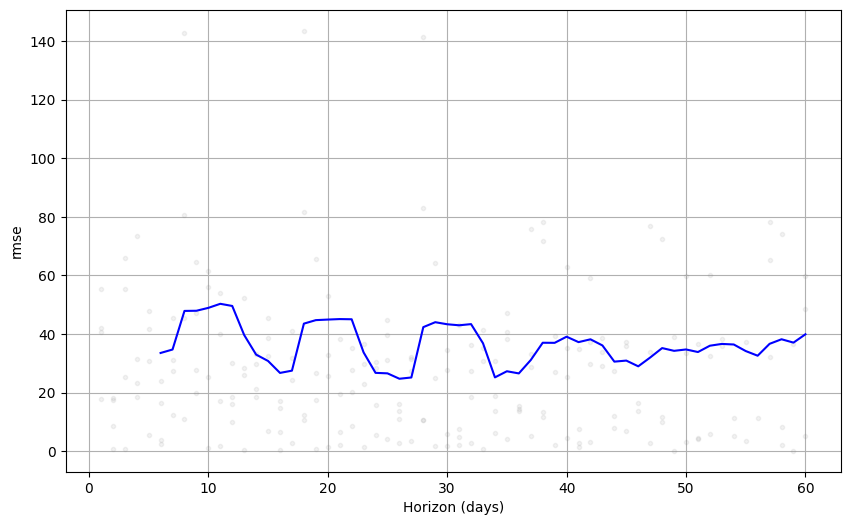

In [ ]:
fig=plot_cross_validation_metric(df_cv_final,metric='rmse')

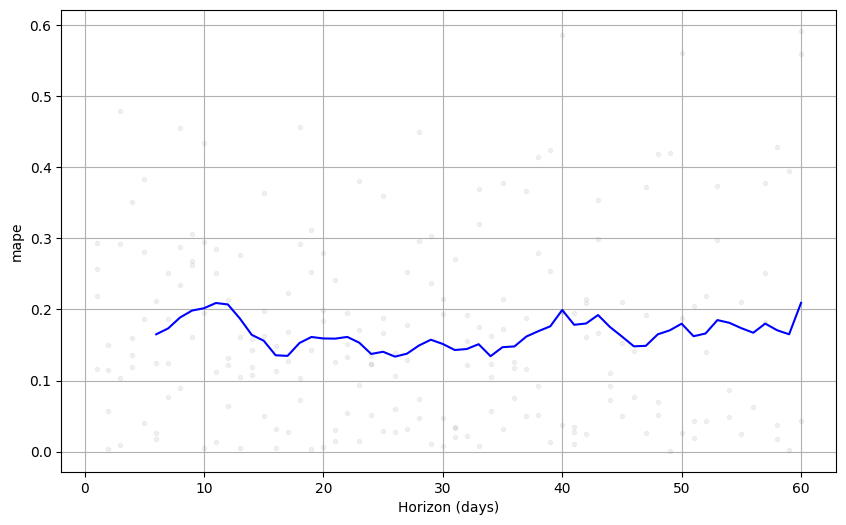

In [ ]:
fig=plot_cross_validation_metric(df_cv_final,metric='mape')

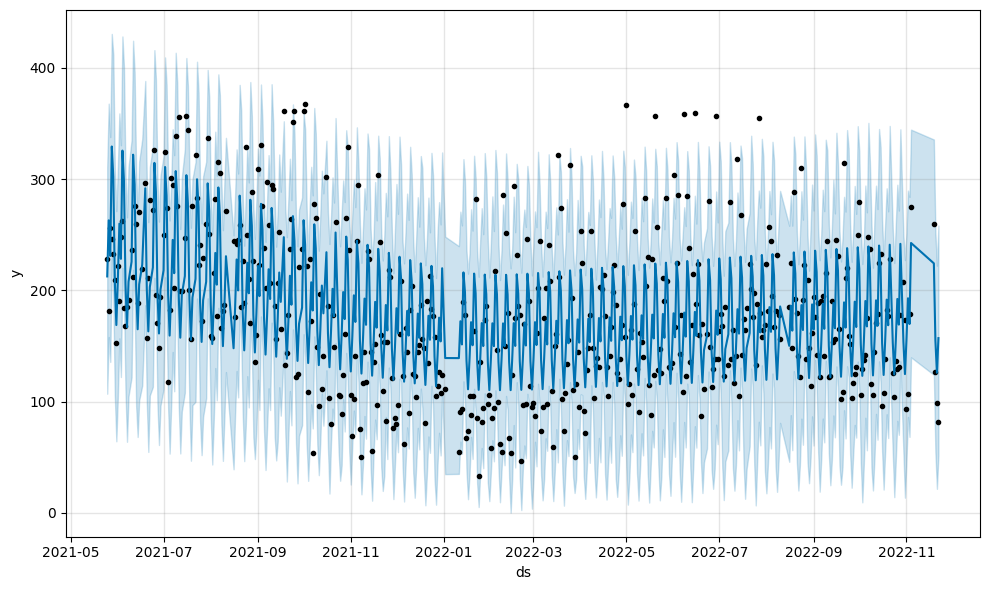

In [ ]:
plot1 = model_tuned.plot(forecast)

In [ ]:
from prophet.plot import plot_plotly
from datetime import datetime

fig = plot_plotly(model_tuned, forecast)
fig.update_layout( 
                  yaxis_title="Birre vendute",
                  xaxis_title="Data",
                  title="Vendita birre",
                  )
fig

In [ ]:
print(f"mape: {df_performance['mape'].mean()}\nmae:{df_performance['mae'].mean()}\nrmse:{df_performance['rmse'].mean()}")

mape: 0.16563381494934082
mae:27.90506129329647
rmse:36.5066988058069


In [227]:
from prophet.plot import plot_components_plotly
plot_components_plotly(model_tuned,forecast)

KeyError: 'beta'

In [ ]:
# Save model
import joblib

joblib.dump(model_tuned,'model_spine.pkl')

['model_spine.pkl']

KeyError: 'beta'

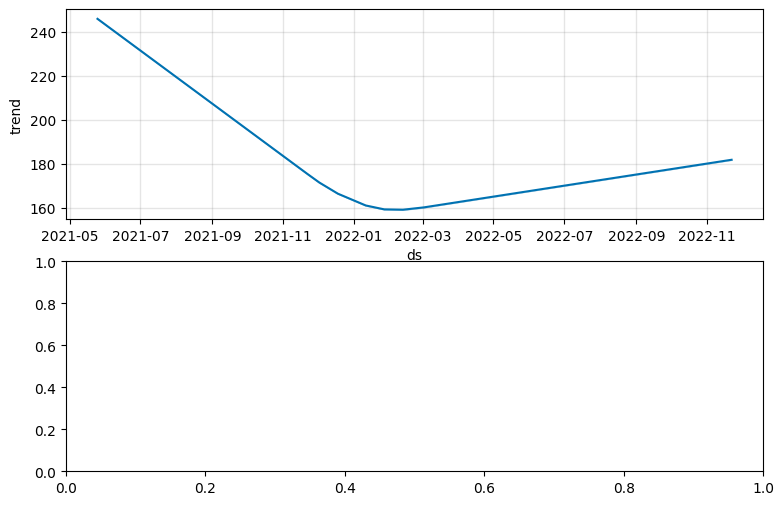

In [242]:
 model_tuned.plot_components(forecast)

In [ ]:
# model_load = joblib.load('model_XGB.pkl')
# future_w_features['pred'] = model_load.predict(future_w_features[FEATURES])
# future_w_features['pred'].plot(figsize=(10, 5),
#                                color='purple',
#                                ms=1, 
#                                lw=1,
#                                title='Future Predictions');

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 7)'>

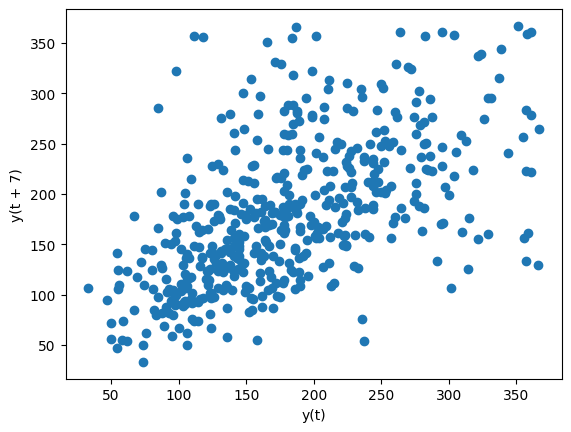

In [225]:
from pandas.plotting import lag_plot
lag_plot(df_spine_rid['y'],7)

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 7)'>

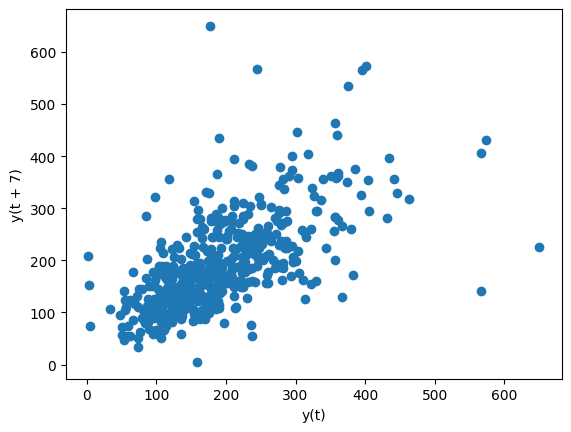

In [ ]:
from pandas.plotting import lag_plot
lag_plot(df_spine['Quantita'],7)

Neural Prophet

In [ ]:
# from neuralprophet import NeuralProphet
# m2 = NeuralProphet()
# metrics2 = m2.fit(df_spine_rid, freq='D')
# forecast2 = m2.predict(df_spine_rid)
# m2.plot(forecast)